<font color='red' size=4>损失函数</font>    
$$ J\left( \boldsymbol{\hat{\beta}}  \right) = \frac{1}{2m} \left( \mathbf{y} - X \boldsymbol{\hat{\beta}} \right)^T \left(\mathbf{y} - X \boldsymbol{\hat{\beta}} \right) + \frac{\alpha}{2} ||\hat{\beta}||^2 $$      
&emsp;&emsp;不能将任何系数收缩为0,因此岭回归不能给出一个简单的可解释的模型

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge # 岭回归

In [209]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 2 * x**3 + 3*x**2 + 2*x + np.random.normal(0, 5, size=100)

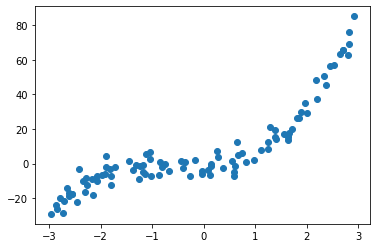

In [210]:
plt.scatter(x, y)
plt.show()

In [211]:
def PolynomialRegression(degree):
    """多项式回归"""
    return Pipeline([ # 管道机制
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [212]:
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y) # 使用留出法划分数据集

In [213]:
poly_reg = PolynomialRegression(degree=20) 
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict) # 测试数据集均方误差较大(多项式回归)

4198.502714977333

In [214]:
def plot_model(model):
    """绘制数据分布与拟合曲线"""
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.ylim(-30, 100)
    plt.show()

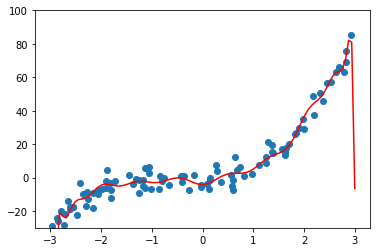

In [215]:
plot_model(poly_reg) # 过拟合(多项式回归)

In [216]:
'''
max_iter : int, default=None
    Maximum number of iterations for conjugate gradient solver.
    For 'sparse_cg' and 'lsqr' solvers, the default value is determined
    by scipy.sparse.linalg. For 'sag' solver, the default value is 1000.
'''
def RidgeRegression(degree, alpha):
    """岭回归"""
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha, max_iter=1000))
    ])

In [217]:
ridge1_reg = RidgeRegression(20, 0.0001) # 设置alpha=0.0001
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict) # 测试数据集均方误差显著减小

33.08230541435693

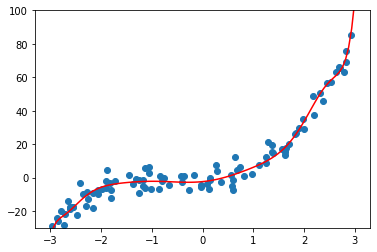

In [218]:
plot_model(ridge1_reg)

In [219]:
ridge2_reg = RidgeRegression(20, 1) # 设置alpha=1
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

32.241813504806125

In [220]:
ridge2_reg[2].coef_ # 岭回归项的系数(没有系数为0)

array([ 0.        ,  5.86516012,  8.27022987,  9.86856433,  3.14079726,
        6.35703775,  0.08466384,  2.67604296, -1.57761688,  0.21023875,
       -2.12826918, -1.04951945, -1.89180696, -1.3799829 , -1.13284456,
       -1.04964079, -0.0388669 , -0.26577632,  1.26357208,  0.82206926,
        2.68936289])

In [221]:
ridge2_reg[2].intercept_ # 岭回归截距项

6.8665173684644305

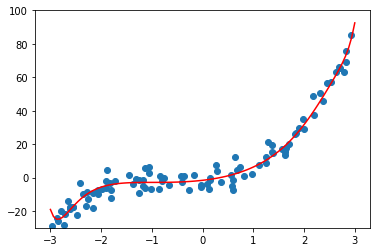

In [222]:
plot_model(ridge2_reg) # 较好的拟合了测试数据集原本的分布

In [223]:
ridge3_reg = RidgeRegression(20, 100) # 设置alpha=100
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

128.43140665227426

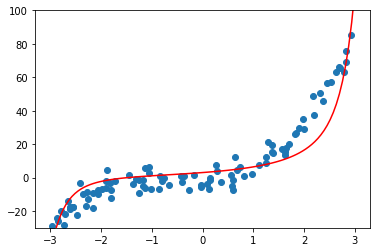

In [224]:
plot_model(ridge3_reg)

In [225]:
ridge4_reg = RidgeRegression(20, 10000) # 设置alpha=10000
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

665.6478013938577

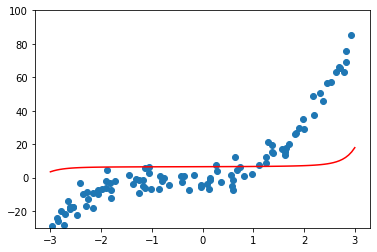

In [226]:
plot_model(ridge4_reg) # 欠拟合(alpha过大)

In [227]:
ridge4_reg[2].coef_ # 尽管很多系数接近于0,却都无法归结于0

array([0.        , 0.14244397, 0.05685922, 0.1521708 , 0.057879  ,
       0.14767943, 0.05882382, 0.14238187, 0.06023629, 0.13787521,
       0.06186937, 0.13412561, 0.06352123, 0.13090705, 0.06507696,
       0.12803189, 0.0664771 , 0.12537116, 0.06769425, 0.12284139,
       0.06871965])